<a href="https://colab.research.google.com/github/priyankashinde-DS/Capstone_health_insurance_prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

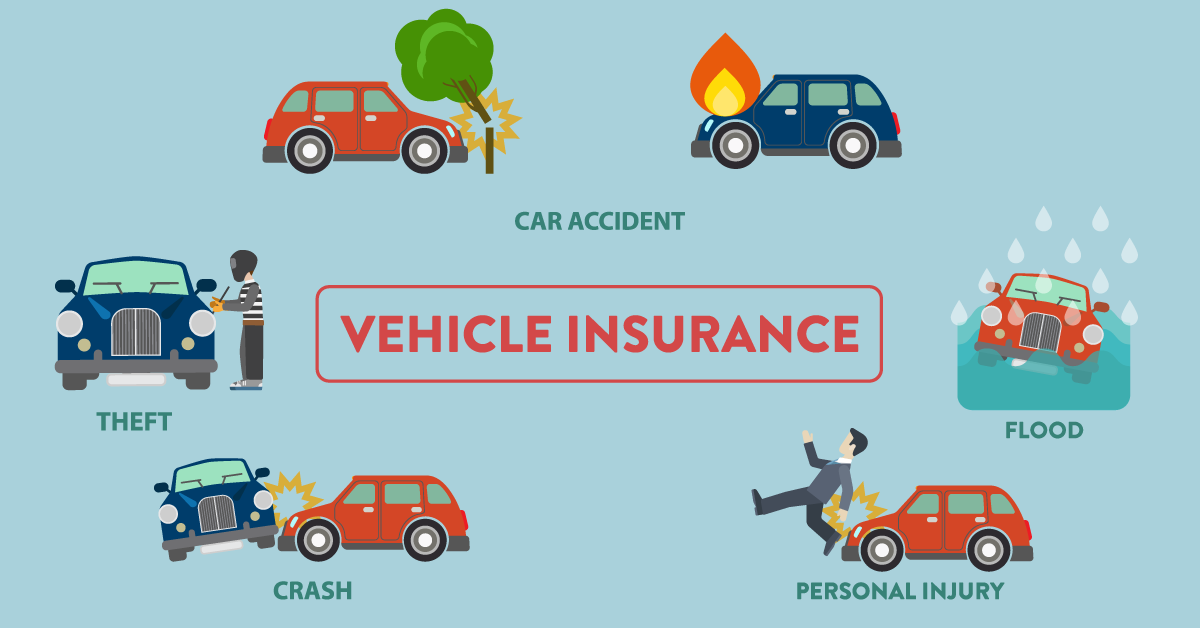

# **Problem Statement**

---
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [38]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Libraries**

In [135]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn.linear_model import SGDRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import time
from datetime import datetime
from math import sqrt
# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [136]:
#Let’s read the data.
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/Supervised ML-Classification/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [137]:
#look at the top 5 rows in the dataframe
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [138]:
df.tail(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [139]:
df.shape

(381109, 12)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### In this dataset, we have 12 columns of different data types like int64, float64, and object.

In [141]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [142]:
# check NaN values count
df.isna().sum().to_frame().rename(columns={0:'Missing Value '}).style.background_gradient(cmap='Blues_r')

,Missing Value
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


#### ***We don’t have any missing values in this data.***

In [143]:
# Number of columns and number of unique values present in it

print('columns and number of unique values')
dict=[]
for i in df.columns:
    print(f'{i} --> {df[i].nunique()}')

columns and number of unique values
id --> 381109
Gender --> 2
Age --> 66
Driving_License --> 2
Region_Code --> 53
Previously_Insured --> 2
Vehicle_Age --> 3
Vehicle_Damage --> 2
Annual_Premium --> 48838
Policy_Sales_Channel --> 155
Vintage --> 290
Response --> 2


In [144]:
# check duplicates
df.duplicated().sum()

0

In [145]:
# target variable
dependable_variable=df['Response']

#### ***It is also important to look at the target column, as it will tell us whether the problem is a balanced problem or an imbalanced problem. This will define our approach further.***

# **Univariate Analysis**

Text(0.5, 1.0, 'Customers Segregation')

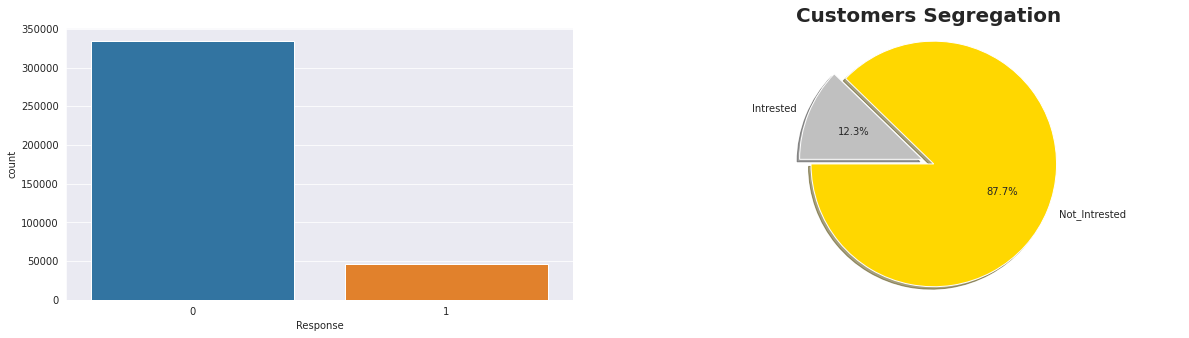

In [146]:
# plot target variabler
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(x=df.Response)

# pie chart
plt.subplot(122)
labels='Not_Intrested','Intrested'
sizes = df.Response.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal',size=15,fontdict={"weight": "bold"})
plt.title("Customers Segregation",size=20,fontdict={"weight": "bold"})

#### ***The given dataset is an imbalance problem as the Response variable with the value 1 is significantly lower than the value zero.***

In [147]:
# list of numerical feature
Numerical_features=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

In [148]:
# list of categorical feature
Categorical_features=['Gender','Driving_License','Previously_Insured','Vehicle_Damage','Vehicle_Age']

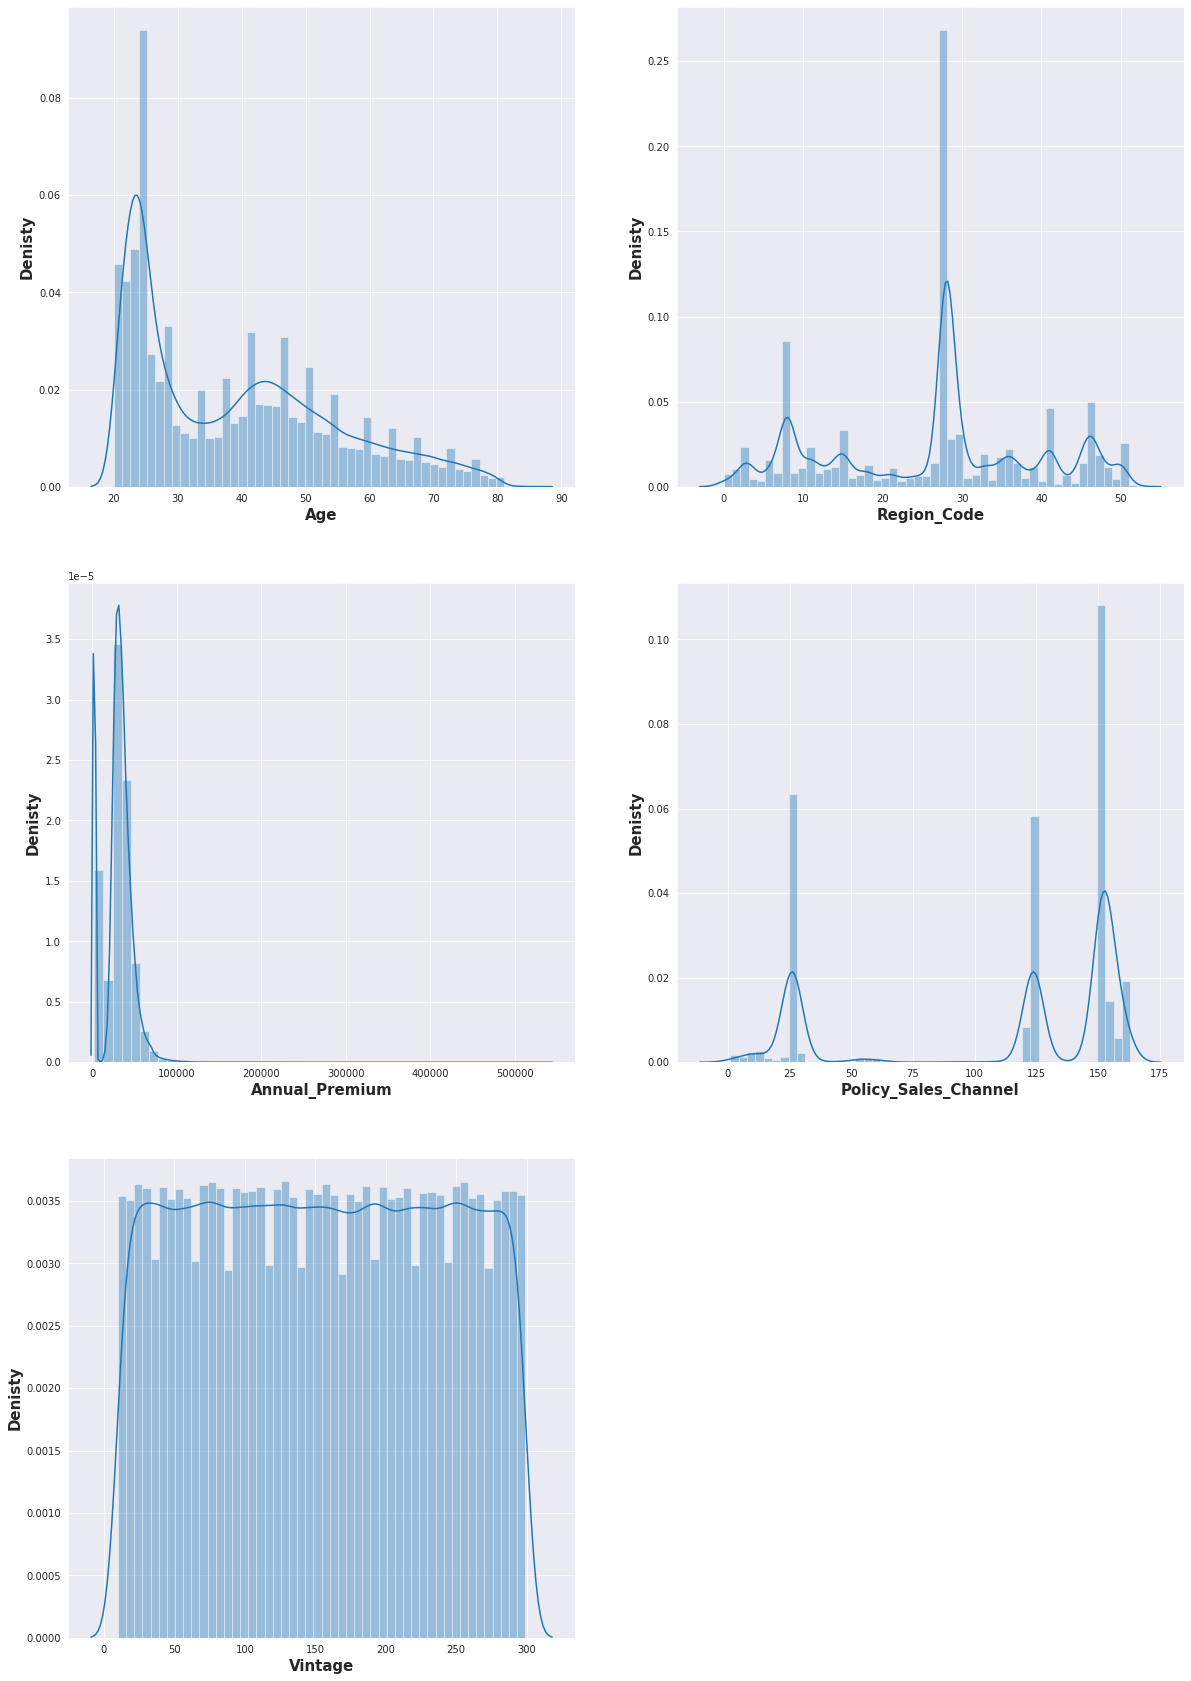

In [149]:
# Let's create subplot of histogram for all Numerical Features

Feature=Numerical_features  # List of all Numerical Features

axes=[]  # For axis

a=0      # No of rows

# Range for subplots 

while a < 3 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(3,2,figsize=(20,30))

plt.xlabel(Feature[i], fontsize=15,fontdict={"weight": "bold"})
plt.ylabel('Density', fontsize=15,fontdict={"weight": "bold"})

for i in range (5):
  ax1=sns.distplot(df[Feature[i]],ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Denisty',size=15,fontdict={"weight": "bold"})

figure.delaxes(axis[2,1]) # Delete extra subplot

In [150]:
df[['Annual_Premium','Vintage','Policy_Sales_Channel']].describe()

,Annual_Premium,Vintage,Policy_Sales_Channel
count,381109.000000,381109.000000,381109.000000
mean,30564.389581,154.347397,112.034295
std,17213.155057,83.671304,54.203995
min,2630.000000,10.000000,1.000000
25%,24405.000000,82.000000,29.000000
50%,31669.000000,154.000000,133.000000
75%,39400.000000,227.000000,152.000000
max,540165.000000,299.000000,163.000000


#### ***we have the distribution of the age. Most of the customers fall in the 20 to 50 age range.***
 
#### ***Similarly, we can see the distribution of annual premium are positively skwed.***

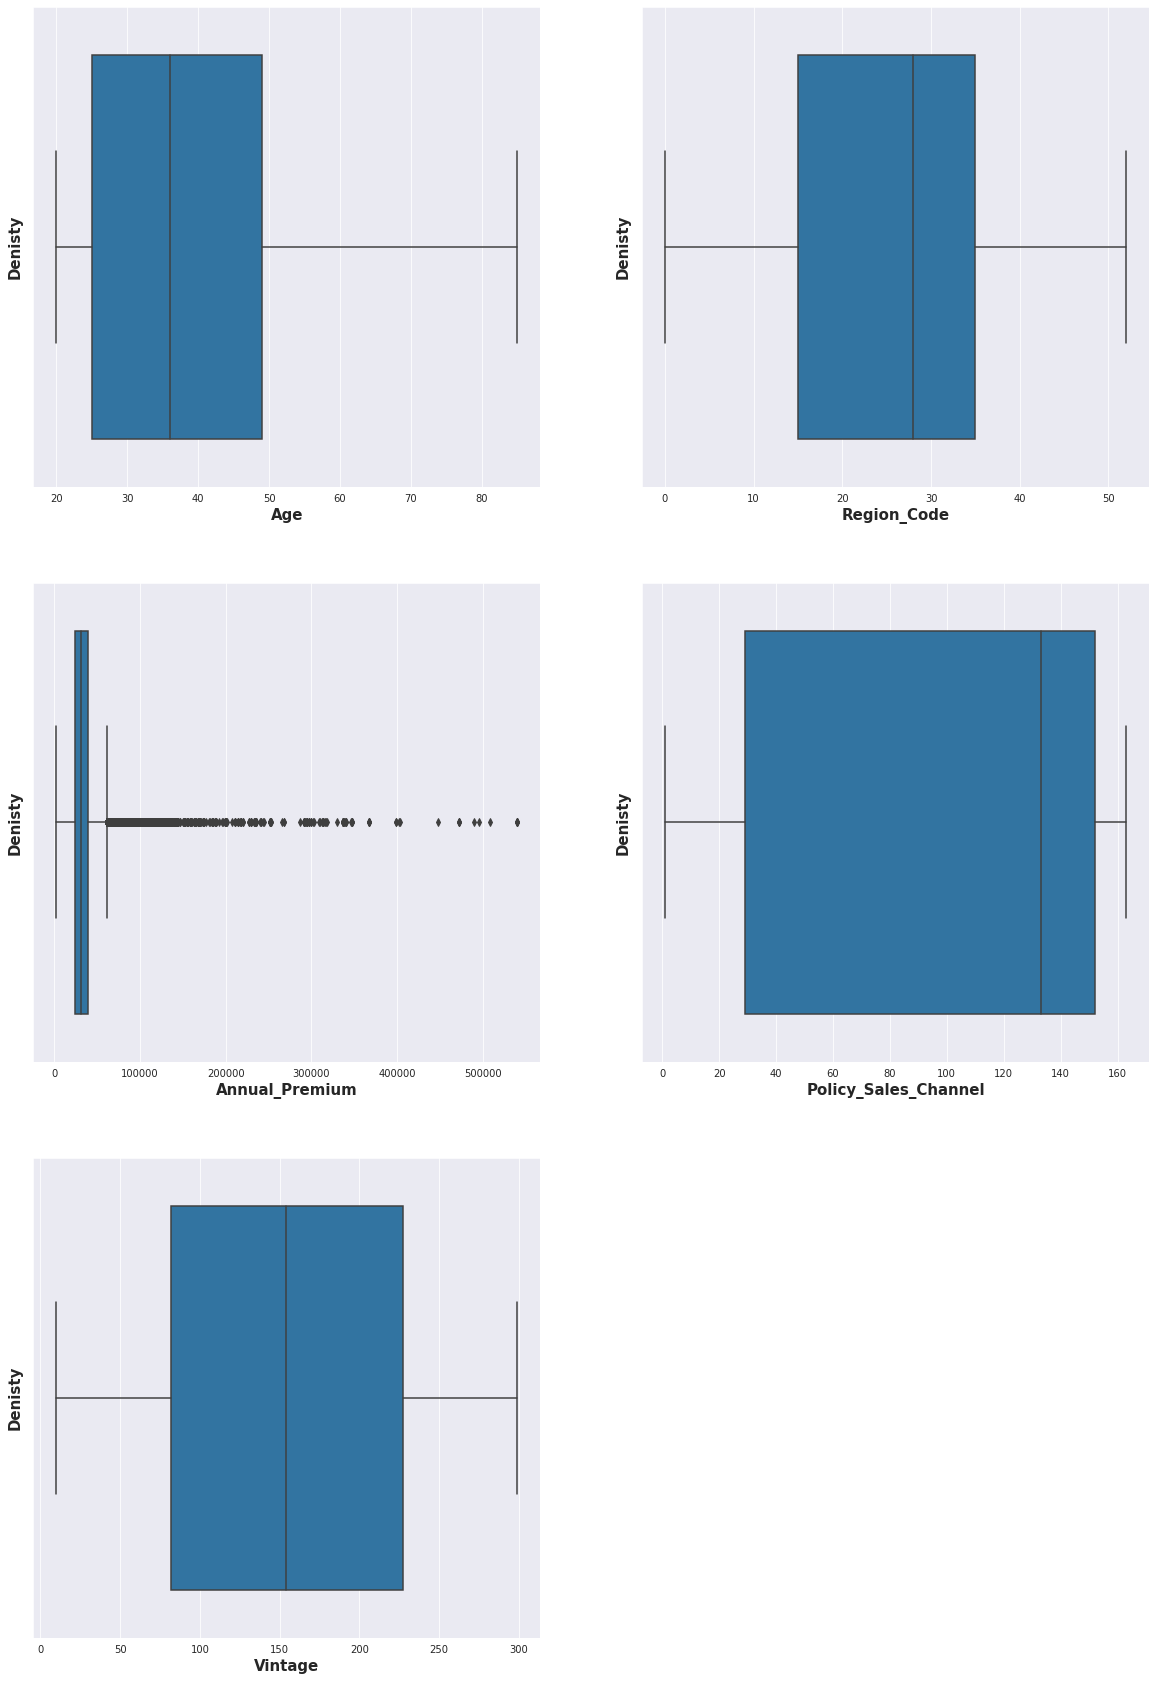

In [151]:
# Let's create subplots of Boxplot for all Numerical Features

Feature=Numerical_features  # List of all Numerical Features

axes=[]  # For axis
a=0      # No of rows

# Range for subplots 

while a < 3 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(3,2,figsize=(20,30))

plt.xlabel(Feature[i], fontsize=15,fontdict={"weight": "bold"})
plt.ylabel('Density', fontsize=15,fontdict={"weight": "bold"})

for i in range (5):
  ax1=sns.boxplot(df[Feature[i]],ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Denisty',size=15,fontdict={"weight": "bold"})

figure.delaxes(axis[2,1]) # Delete extra subpl

#### ***from the above boxplot we can see that there's a lot of outliers in the annual premium. this will need to be scaled with robust scaler to better the evaluation matrix.***

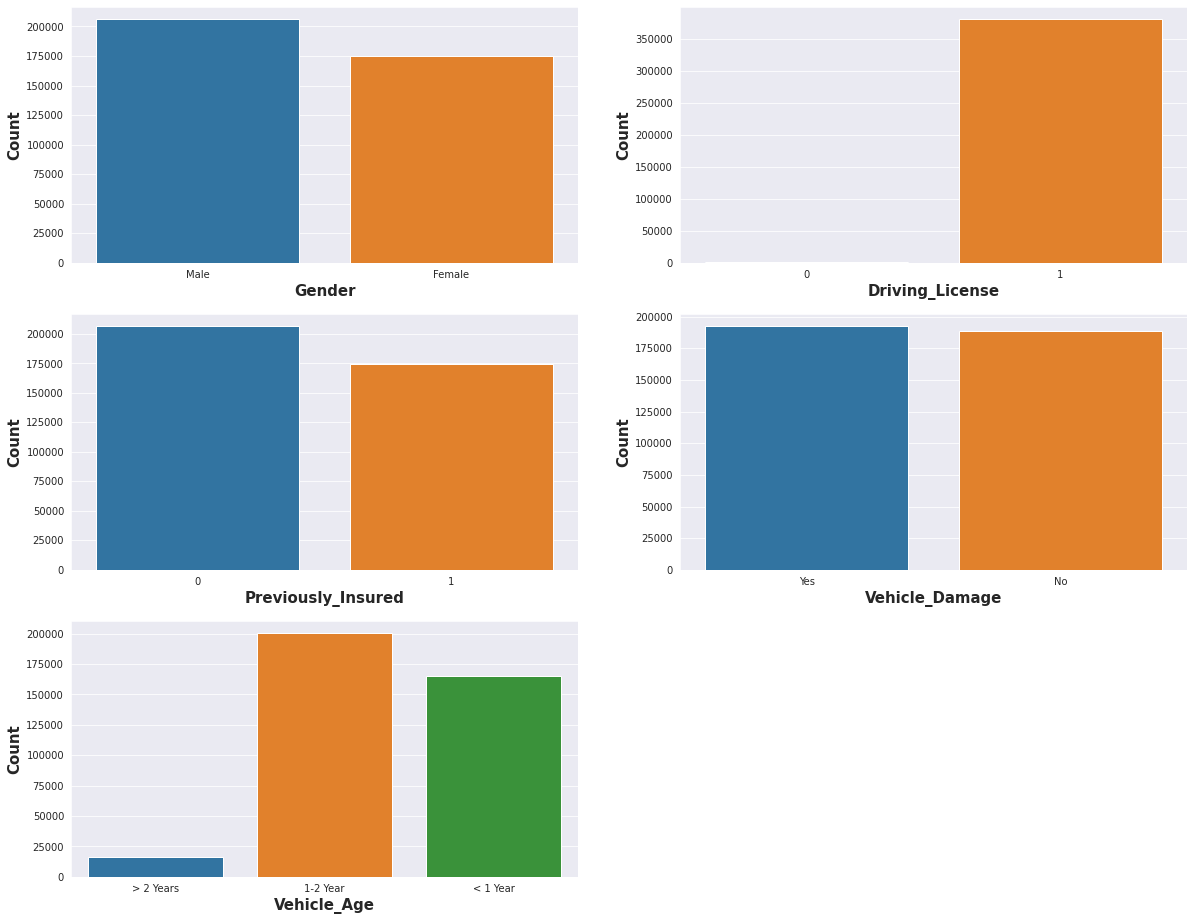

In [152]:
# Let's create subplot of Countplot for all Categorical variables

Feature=Categorical_features  # Lsit of all Categorical variables

axes=[]  # For axis
a=0      # No of rows

# Range for subplots 

while a < 3 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(3,2,figsize=(20,16))

plt.xlabel(Feature[i], fontsize=15,fontdict={"weight": "bold"})
plt.ylabel('count', fontsize=15,fontdict={"weight": "bold"})

for i in range (5):
  ax1=sns.countplot(df[Feature[i]],ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Count',size=15,fontdict={"weight": "bold"})

figure.delaxes(axis[2,1]) # Delete extra subplot

#### ***1) 54 % of the customer of the health insurance is male.***

#### ***2) 99 % customers has a License.***

#### ***3) More than half of the customers does not have a vehicle insurance .***


#### ***4) Half of the health insurance customer have had their vehicle damaged and half have not.***


#### ***5) 95 % of health insurance customers have vehichle that's less than 2 years of Vehicle Age.*** 

# **Bivariate Analysis**

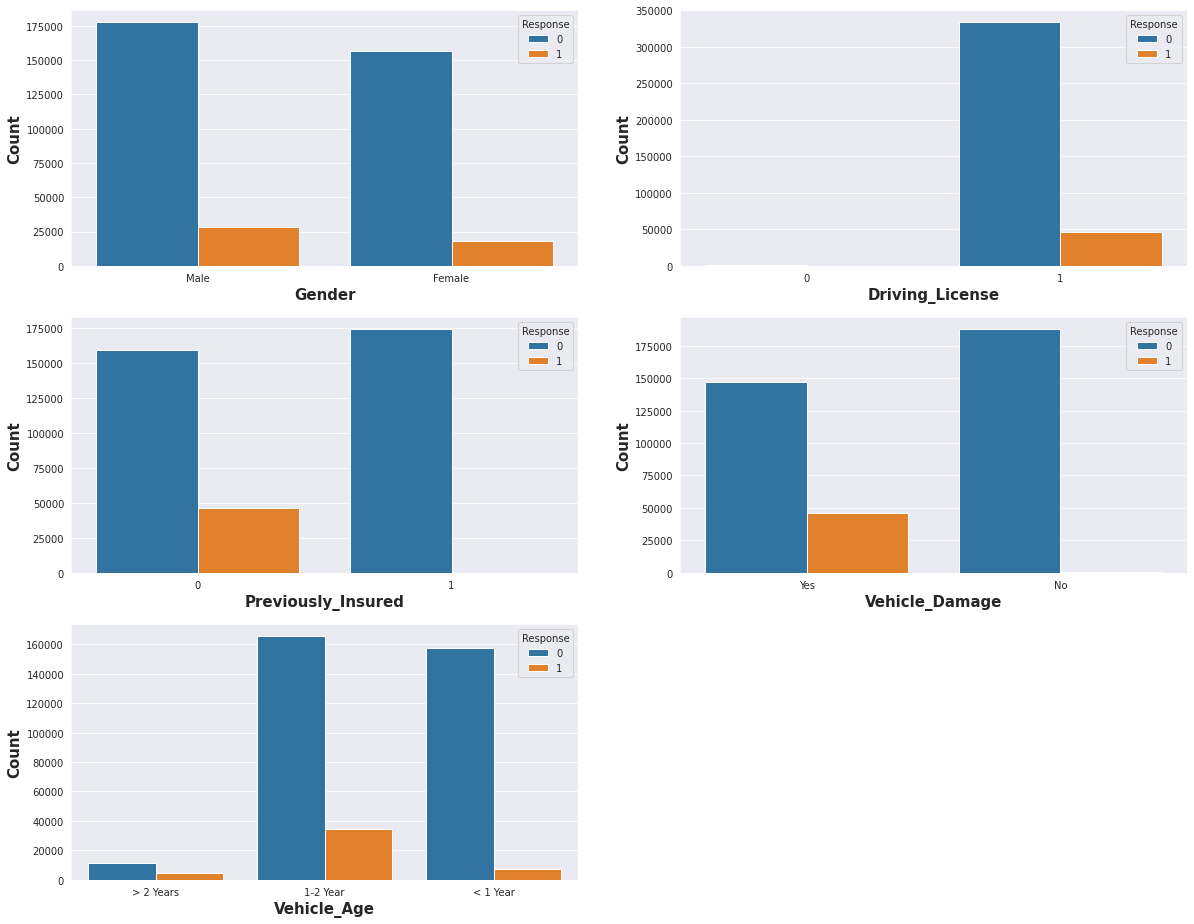

In [153]:
# Let's create subplot of Countplot for all Categorical variables

Feature=Categorical_features  # Lsit of all Categorical variables

axes=[]  # For axis
a=0      # No of rows

# Range for subplots 

while a < 3 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(3,2,figsize=(20,16))

plt.xlabel(Feature[i], fontsize=15,fontdict={"weight": "bold"})
plt.ylabel('count', fontsize=15,fontdict={"weight": "bold"})

for i in range (5):
  ax1=sns.countplot(df[Feature[i]],ax=axis[axes[i][0],axes[i][1]],hue=df['Response'])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Count',size=15,fontdict={"weight": "bold"})

figure.delaxes(axis[2,1]) # Delete extra subplot

#### ***From the above visualizations, we can make the following inferences.***

* ***The male customers own slightly more vehicles and they are more tend to buy insurance in comparison to their female counterparts.***

* ***Similarly, the customers who have driving licences will opt for insurance instead of those who don’t have it.***

* ***The third visualization depicts that the customers want to have only an insurance policy. It means those who already have insurance won’t convert.***


* ***From the  plot, we can infer that if the vehicle has been damaged previously then the customer will be more interested in buying the insurance as they know the cost.***

* ***In the last chart, the customers with vehicle age lesser than the 2 years are more tend to buy insurance.***





In [154]:
Numerical_features

['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

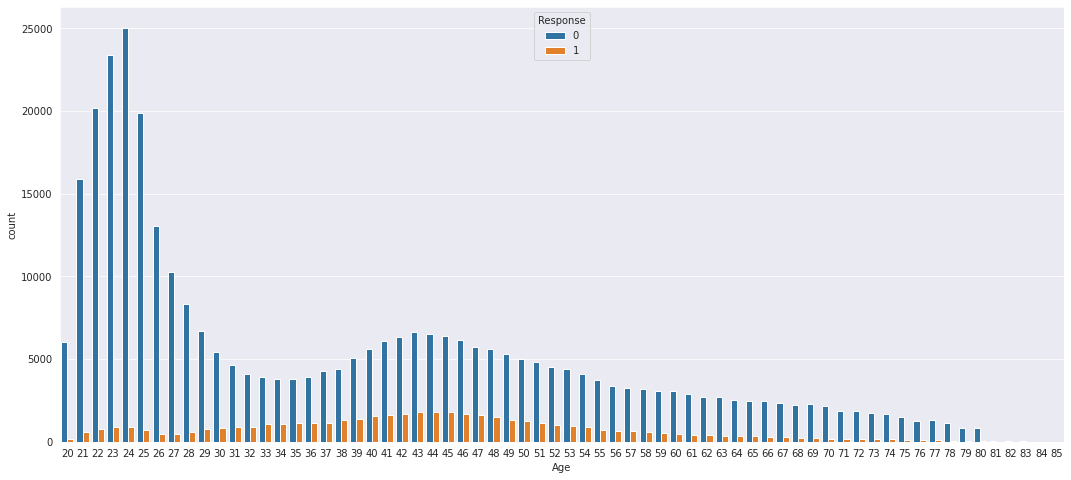

In [155]:
# how ddoes influence with response
plt.figure(figsize = (18, 8))
sns.countplot(df['Age'], hue = df['Response'])

* **Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.**

* **People aged between 30-60 are more likely to be interested.**

# **Data preprocessing**

***The next step in the project is to prepare the data for the modelling. The following preprocessing techniques are being used here***

* ***Convert the categorical features into dummies or doing categorical encoding.***

* ***Binning the numerical features.***
* ***dropping the unnecessary columns like ids.***

In [156]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [157]:
## binning the annual premium into groups 

bin_premium_group = [2600, 25000, 50000, 100000, 200000, df['Annual_Premium'].max()]
label_bin = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']

df['premium_group'] = pd.cut(df['Annual_Premium'], bins = bin_premium_group, labels = label_bin)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,premium_group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Silver
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Silver
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Silver
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Silver
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Silver


In [158]:
pd.crosstab(index = df['Response'], columns = df['premium_group']).style.background_gradient(cmap='Blues')

premium_group,Bronze,Silver,Gold,Platinum,Diamond
Response,,,,,
0,89142,217952,26650,565,90
1,11821,29990,4776,101,22


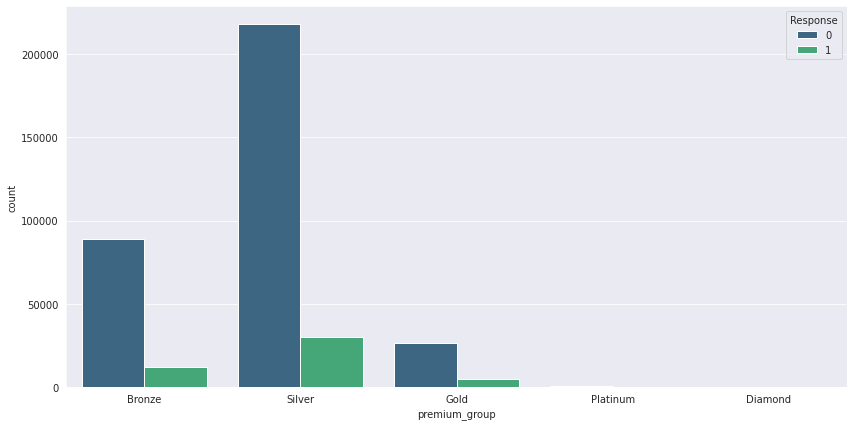

In [159]:
plt.figure(figsize = (14, 7))
sns.countplot(df['premium_group'], hue = df['Response'], palette = 'viridis')

#### ***The more expensive the premium group the more likely the customer are interested with the vehicle insurance.***

In [160]:
## Region 

top_5_region =  pd.crosstab(index = df['Region_Code'], columns = df['Response']).sort_values(1, ascending = False).head()
top_5_region

Response,0,1
Region_Code,,
28.0,86498,19917
8.0,30620,3257
41.0,16039,2224
46.0,17717,2032
29.0,9700,1365


In [161]:
pd.crosstab(index = df['Region_Code'], columns = df['Response'], normalize = 'index').sort_values(1, ascending = False).head()

Response,0,1
Region_Code,,
38.0,0.807996,0.192004
28.0,0.812837,0.187163
19.0,0.837134,0.162866
4.0,0.841755,0.158245
23.0,0.846939,0.153061


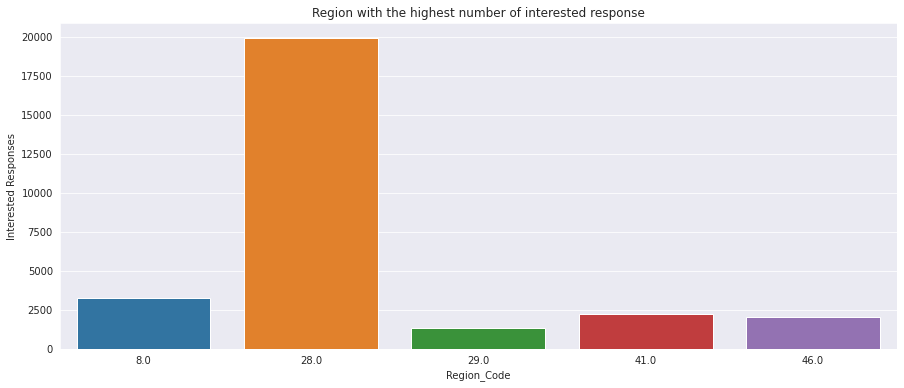

In [162]:
plt.figure(figsize = (15, 6))

sns.barplot(x = top_5_region.index, y = top_5_region[1])
plt.ylabel('Interested Responses')
plt.title('Region with the highest number of interested response')
plt.show()

In [163]:
df.drop('id',axis=1,inplace=True)

In [164]:
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1}).astype(int)

In [165]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [166]:
df['Vehicle_Damage'].replace({'Yes':1,'No':0},inplace=True)
df['Vehicle_Age']=df['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2, '> 2 Years':3})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,premium_group
0,1,44,1,28.0,0,3,1,40454.0,26.0,217,1,Silver
1,1,76,1,3.0,0,2,0,33536.0,26.0,183,0,Silver
2,1,47,1,28.0,0,3,1,38294.0,26.0,27,1,Silver
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,Silver
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,Silver


#### ***data has been preprocessed we can perform some operations.***

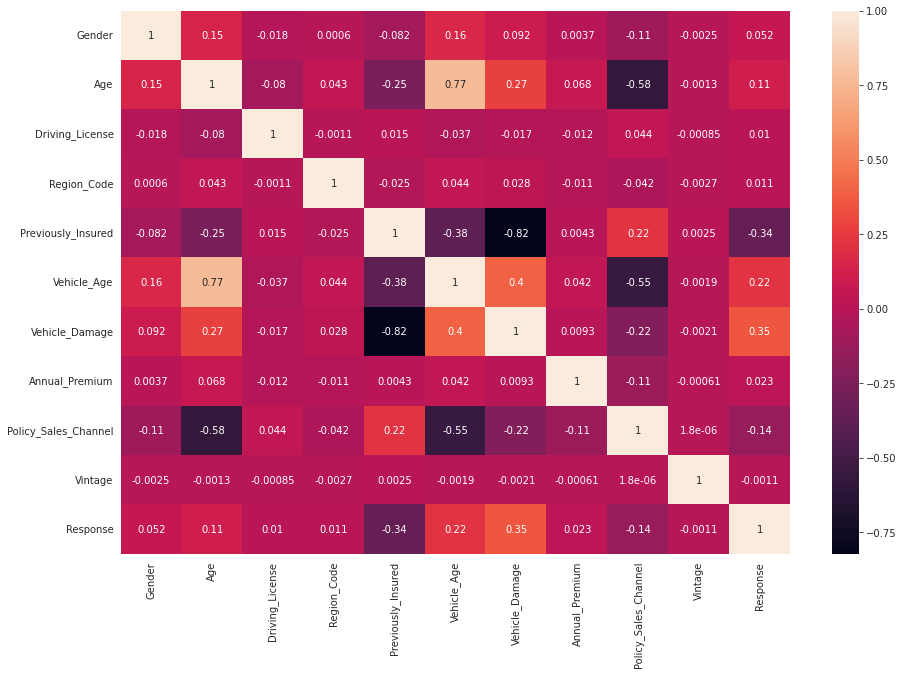

In [167]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

 Insights
* ***Focus more on customers between 35-54 years old.***
* ***Pinpoint the strategies that work best with each segment.***
* ***Target marketing campaigns to some region codes and policy sales channels.***